In [42]:
import pandas_ta as ta
import pandas as pd
import numpy as np
from datetime import datetime
import main_functions
# import yfinance as yf

In [44]:
import importlib
# If you want to update the module:
importlib.reload(main_functions)
from main_functions import *

In [70]:
pd.set_option('display.max_rows', 400)  # Set the maximum number of rows to display

# Defining the variables

In [55]:
ticker = "BTCUSDT"
timeframe = "1D"
start = "2023-01-01"
start_date = datetime.strptime(start, "%Y-%m-%d")
end = str(datetime.now())
# Calculate the difference in days
day = (datetime.now() - start_date).days

In [56]:
df = getdata(ticker, timeframe, day)

In [67]:
df['candle_type'] = np.where(
    (df['High'] > df['High'].shift(1)) &
    (df['Low'] > df['Low'].shift(1)),
    "up_bar",
    np.where(
        (df['High'] < df['High'].shift(1)) &
        (df['Low'] < df['Low'].shift(1)),
        "down_bar",
        np.where(
            (df['High'] > df['High'].shift(1)) &
            (df['Low'] < df['Low'].shift(1)) &
            (df['Open'] > df['Close']),
            "outside_dn_up",
            np.where(
                (df['High'] > df['High'].shift(1)) &
                (df['Low'] < df['Low'].shift(1)) &
                (df['Open'] < df['Close']),
                "outside_up_dn",
                ""
            )
        )
    )
)


In [72]:
def f_sw_inc_cnt(p_cnt, p_max_cnt):
    new_cnt = p_cnt
    
    if p_cnt < 0:
        new_cnt = 1
    else:
        if p_cnt + 1 > p_max_cnt:
            new_cnt = p_max_cnt
        else:
            new_cnt = p_cnt + 1
            
    return new_cnt


In [80]:
# Create the 'sw_cnt' column with a default value (0)
df['p_cnt'] = 0
df["p_cnt"] = np.where(df['candle_type'] == "up_bar", df.apply(lambda row: f_sw_inc_cnt(row['p_cnt'], 3), axis=1), 0)

In [84]:
df = df.drop(columns=['p_cnt', 'sw_cnt'])

In [82]:
df["sw_cnt"] = np.where(df['candle_type'] == "up_bar", df.apply(lambda row: f_sw_inc_cnt(row['p_cnt'], 3), axis=1), 0)

In [101]:
p_cnt = []
max_cnt = 3

for i in range(len(df)):
    
    if i == 0:
        p_cnt.append(0)
        print(i, p_cnt)
        
    else:
        if (df['candle_type'][i] == "up_bar" or df['candle_type'][i] == "outside_dn_up") and p_cnt[i-1] < 0:
            p_cnt.append(1)
            print(i, p_cnt)
        
        elif (df['candle_type'][i] == "up_bar" or df['candle_type'][i] == "outside_dn_up") and p_cnt[i-1] < max_cnt:
            p_cnt.append(p_cnt[i-1] + 1)
            print(i, p_cnt)
        
        elif (df['candle_type'][i] == "up_bar" or df['candle_type'][i] == "outside_dn_up") and p_cnt[i-1] == max_cnt:
            p_cnt.append(max_cnt)
            print(i, p_cnt)
            
        elif (df['candle_type'][i] == "down_bar" or df['candle_type'][i] == "outside_up_dn") and p_cnt[i-1] > 0:
            p_cnt.append(-1)
            print(i, p_cnt)
        
        elif (df['candle_type'][i] == "down_bar" or df['candle_type'][i] == "outside_up_dn") and p_cnt[i-1] > -max_cnt:
            p_cnt.append(p_cnt[i-1] - 1)
            print(i, p_cnt)
        
        elif (df['candle_type'][i] == "down_bar" or df['candle_type'][i] == "outside_up_dn") and p_cnt[i-1] == -max_cnt:
            p_cnt.append(-max_cnt)
            print(i, p_cnt)
            
        else:
            p_cnt.append(p_cnt[i-1])


    
        

0 [0]
1 [0, 1]
2 [0, 1, 2]
3 [0, 1, 2, -1]
4 [0, 1, 2, -1, 1]
5 [0, 1, 2, -1, 1, -1]
6 [0, 1, 2, -1, 1, -1, -2]
7 [0, 1, 2, -1, 1, -1, -2, 1]
8 [0, 1, 2, -1, 1, -1, -2, 1, -1]
9 [0, 1, 2, -1, 1, -1, -2, 1, -1, -2]
10 [0, 1, 2, -1, 1, -1, -2, 1, -1, -2, -3]
11 [0, 1, 2, -1, 1, -1, -2, 1, -1, -2, -3, 1]
13 [0, 1, 2, -1, 1, -1, -2, 1, -1, -2, -3, 1, 1, 2]
14 [0, 1, 2, -1, 1, -1, -2, 1, -1, -2, -3, 1, 1, 2, -1]
15 [0, 1, 2, -1, 1, -1, -2, 1, -1, -2, -3, 1, 1, 2, -1, -2]
16 [0, 1, 2, -1, 1, -1, -2, 1, -1, -2, -3, 1, 1, 2, -1, -2, -3]
18 [0, 1, 2, -1, 1, -1, -2, 1, -1, -2, -3, 1, 1, 2, -1, -2, -3, -3, -3]
20 [0, 1, 2, -1, 1, -1, -2, 1, -1, -2, -3, 1, 1, 2, -1, -2, -3, -3, -3, -3, 1]
21 [0, 1, 2, -1, 1, -1, -2, 1, -1, -2, -3, 1, 1, 2, -1, -2, -3, -3, -3, -3, 1, -1]
22 [0, 1, 2, -1, 1, -1, -2, 1, -1, -2, -3, 1, 1, 2, -1, -2, -3, -3, -3, -3, 1, -1, 1]
23 [0, 1, 2, -1, 1, -1, -2, 1, -1, -2, -3, 1, 1, 2, -1, -2, -3, -3, -3, -3, 1, -1, 1, 2]
24 [0, 1, 2, -1, 1, -1, -2, 1, -1, -2, -3, 1, 1, 2, -1, 

In [103]:
df['sw_cnt'] = p_cnt

In [104]:
df.head(200)

,Open,High,Low,Close,Volume,candle_type,sw_cnt
timestamp,,,,,,,
2021-12-20,46668.65,47533.42,45530.67,46898.14,273804.259,,0
2021-12-21,46896.82,49298.78,46650.00,48875.15,260008.358,up_bar,1
2021-12-22,48875.88,49599.00,48420.02,48569.69,208463.689,up_bar,2
2021-12-23,48569.69,51377.74,48020.00,50817.92,255885.480,outside_up_dn,-1
2021-12-24,50817.94,51805.00,50379.25,50808.55,220208.725,up_bar,1
2021-12-25,50809.37,51190.00,50105.00,50403.64,147662.438,down_bar,-1
2021-12-26,50403.64,51300.00,49350.00,50765.73,184800.616,outside_up_dn,-2
2021-12-27,50765.73,52134.00,50450.00,50707.72,216225.263,up_bar,1
2021-12-28,50707.72,50713.56,47290.00,47522.03,336083.340,down_bar,-1


In [8]:
def getSignals(df, **kwargs):
#     df = getdata(ticker)

    # Extract the parameter values from the kwargs dictionary
    mult = kwargs.get('mult', 1)
    HL = kwargs.get('HL', 20)
    risk = kwargs.get('risk', 15)
    
    df = pd.concat((df,ta.ha(df.Open, df.High, df.Low, df.Close)), axis = 1)
    df= df.astype(float)
    df['MinLow'] = df['HA_low'].shift(1).rolling(HL).min()
    df['MaxHigh'] = df['HA_high'].shift(1).rolling(HL).max()
    df['shifted_open'] = df.Open.shift(-1)
    df['buyrisk'] = (df['Close'] - df['MinLow'])/df['Close'] 
    df['sellrisk'] = (df['MaxHigh'] - df['Close'])/df['Close']
    df['longTP'] = ((df.Close - df.MinLow) * mult) + df.Close
    df['shortTP'] = df.Close - ((df.MaxHigh - df.Close) * mult)
    # Apply the conditions for buySignal
    df['buySignal'] = np.where(
                        (df['HA_close'].shift(1) < df['HA_open'].shift(1)) &
                        (df['HA_low'] == df['HA_open']) &
                        (df['HA_low'].shift(1) == df['MinLow']) &
                        (takeLong == True) &
                        (df['buyrisk'] < risk/100),
                        1,
                        0
    )
    df['shortSignal'] = np.where(
                    (df['HA_close'].shift(1) > df['HA_open'].shift(1)) &
                    (df['HA_high'] == df['HA_open']) &
                    (df['HA_high'].shift(1) == df['MaxHigh']) &
                    (takeShort == True) &
                    (df['sellrisk'] < risk/100),
                    -1,
                    0
    )
    return df

# Trades Display

def displayTrades():
    ct = min(len(buydates),len(selldates))
    dfr =pd.DataFrame()
    dfr['buydates']= buydates[:ct]
    dfr['buyprice']= buyprices[:ct]
    dfr['selldates'] = selldates[:ct]
    dfr['sellprice'] = sellprices[:ct]
    dfr['profits'] = (profits[:ct])
    dfr['commulative_returns'] = ((pd.Series(profits) + 1).cumprod())
    dfr['tradeSide'] = np.where(dfr['buydates'] < dfr['selldates'], 'Long', 'Short')
    return dfr

# df = getSignals(df)

In [49]:
df = getdata(ticker, timeframe, 1000)
df

2020-12-13 19:18:43


,Open,High,Low,Close,Volume
timestamp,,,,,
2021-09-20,47247.3,47307.7,42510.0,42992.9,5755.786473
2021-09-21,42992.9,43624.7,39579.0,40710.6,7261.151605
2021-09-22,40710.5,44024.2,40600.0,43562.8,3503.537804
2021-09-23,43563.3,45000.0,43111.6,44889.8,4176.711541
2021-09-24,44888.9,45153.0,40750.0,42833.2,4412.377823
...,...,...,...,...,...
2023-09-05,25806.3,25868.8,25580.5,25788.7,941.714679
2023-09-06,25788.8,26000.0,25385.2,25763.8,1152.756662
2023-09-07,25763.7,26487.7,25609.0,26236.4,2170.143596


# Backtest

In [11]:
def backtest(df, **kwargs):
    
    df = getSignals(df_, **kwargs)
    # Extract the parameter values from the kwargs dictionary
    mult = kwargs.get('mult', 1)
    HL = kwargs.get('HL', 20)
    risk = kwargs.get('risk', 15)
    
    in_position = False
    buy_pos = False
    sell_pos = False
    
    global buydates, buyprices, selldates, sellprices, profits
    global results_df
    results_df = pd.DataFrame()
    buydates, buyprices = [],[]
    selldates, sellprices = [],[]

    for index,row in df.iterrows():
    # long position block
        if not in_position and row.buySignal == 1:
            buyprice = row.shifted_open
            buydates.append(index)
            buyprices.append(buyprice)
            in_position = True
            buy_pos = True
            sl = row.MinLow
            tp = row.longTP
        elif in_position and buy_pos:
            if (row.Low <= sl):
                selldates.append(index)
                sellprices.append(sl)
                in_position = False
                buy_pos = False
            elif in_position and (row.High >= tp):
                selldates.append(index)
                sellprices.append(tp)
                in_position = False
                buy_pos = False

    # short position block
        elif not in_position and row.shortSignal == -1:
            sellprice = row.shifted_open
            selldates.append(index)
            sellprices.append(sellprice)
            in_position = True
            sell_pos = True
            sl = row.MaxHigh
            tp = row.shortTP
        else:
            if in_position and sell_pos and (row.High >= sl):
                buydates.append(index)
                buyprices.append(sl)
                in_position = False
                sell_pos = False
            elif in_position and (row.Low <= tp):
                buydates.append(index)
                buyprices.append(tp)
                in_position = False
                sell_pos = False


    try:
        if len(buydates) == 0:
            print("No trades were made.")
        else:
            profits = [(sell - buy)/buy - commission for sell,buy in zip(sellprices, buyprices)]
            returns = ((pd.Series(profits, dtype=float) + 1).prod()-1)*100
            wins = 0
            for i in profits:
                if i > 0:
                    wins+=1
                i+=1
            winrate = round((wins/len(buydates))*100,2)
            ct = min(len(buydates),len(selldates))
            # BTCUSDT buy and hold returns during the same period

            buy_hold_ret = (df['Close'][-1]-df['Open'][0])/df['Open'][0] *100
            results_df = pd.concat([results_df, pd.DataFrame({'ticker': f'{ticker}', 'returns': [returns], 'winrate': [winrate], 'trades':[ct], 'buy&hold_ret%' : [buy_hold_ret], 'mult' : [mult], 'No. of H/L previous Candles':[HL], 'Max Risk%':[risk]})])
            print(f'{ticker}, winrate={winrate}%, returns={round(returns,2)}%, no. of trades = {ct}, buy&hold_ret = {round(buy_hold_ret,2)}%, mult = {mult}, No. of H/L previous Candles : {HL}, Max Risk% : {risk}')
    except:
        print(f'Invalid input')
        
    return results_df['returns']

backtest(df)

BTCUSDT, winrate=40.38%, returns=-3.14%, no. of trades = 52, buy&hold_ret = -4.1%, mult = 1, No. of H/L previous Candles : 20, Max Risk% : 15


0   -3.144464
Name: returns, dtype: float64

In [12]:
results_df

,ticker,returns,winrate,trades,buy&hold_ret%,mult,No. of H/L previous Candles,Max Risk%
0,BTCUSDT,-3.144464,40.38,52,-4.10204,1,20,15


In [13]:
dfr = displayTrades()
dfr

,buydates,buyprice,selldates,sellprice,profits,commulative_returns,tradeSide
0,2023-06-07 03:15:00,26845.8,2023-06-07 01:00:00,27120.0,0.009814,1.009814,Short
1,2023-06-10 17:15:00,25809.7,2023-06-10 18:15:00,25355.0,-0.018017,0.991620,Long
2,2023-06-13 00:15:00,25962.5,2023-06-12 18:00:00,25773.0,-0.007699,0.983985,Short
3,2023-06-13 15:45:00,25710.7,2023-06-13 12:45:00,26070.6,0.013598,0.997365,Short
4,2023-06-15 11:30:00,25002.5,2023-06-15 18:45:00,25228.2,0.008627,1.005970,Long
5,2023-06-16 13:15:00,25620.0,2023-06-16 04:30:00,25527.4,-0.004014,1.001932,Short
6,2023-06-16 15:00:00,25610.9,2023-06-16 17:15:00,26079.7,0.017905,1.019871,Long
7,2023-06-17 12:15:00,26545.6,2023-06-17 15:15:00,26394.0,-0.006111,1.013638,Long
8,2023-06-21 10:15:00,29000.0,2023-06-21 06:15:00,28820.0,-0.006607,1.006941,Short
9,2023-06-21 13:45:00,29223.6,2023-06-21 10:45:00,28821.7,-0.014153,0.992691,Short


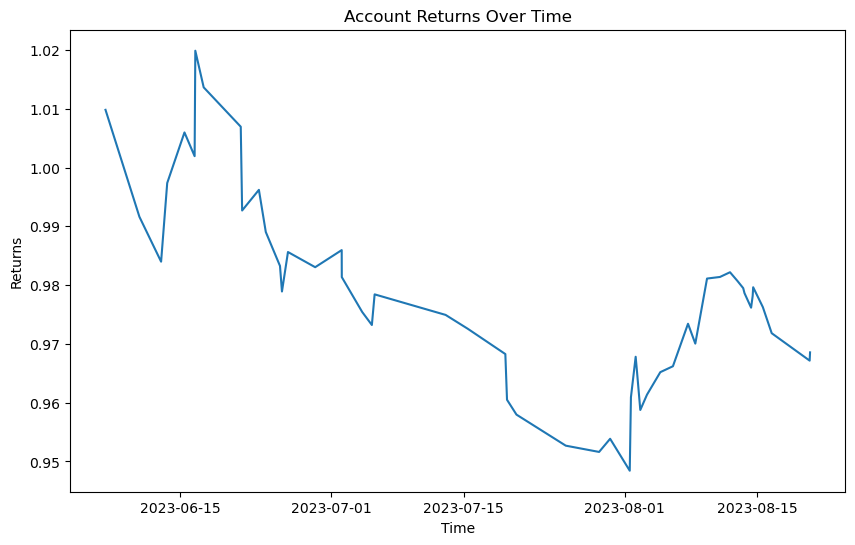

In [14]:
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(10,6))

# Plot the account balance column
plt.plot(dfr.buydates, dfr.commulative_returns)

# Add labels to the plot
plt.title('Account Returns Over Time')
plt.xlabel('Time')
plt.ylabel('Returns')

# Display the plot
plt.show()

# Optuna Hyperparameter Optimization

In [78]:
import optuna # !pip install optuna

# streamlit inputs should be mult,HL and risk upper and lower values also number of trials (default=100)

def objective(trial):
    mult = trial.suggest_float("mult", 1.0, 5.0)
    HL = trial.suggest_int("HL", 5, 25)
    risk = trial.suggest_int("risk", 1, 15)
    
    # Run your strategy with the trial parameters and calculate a score
    score = backtest(df, mult=mult, HL=HL, risk=risk)
    return score

# Create an Optuna study and run optimization
study = optuna.create_study(direction="maximize")  # You can also use "minimize" depending on your objective
study.optimize(objective, n_trials=100)

# Retrieve the best parameters and score
best_params = study.best_params
best_score = study.best_value

print("Best Parameters:", best_params)
print("Best Score:", best_score)


[I 2023-08-20 19:14:54,233] A new study created in memory with name: no-name-036e93d3-bc04-48eb-853f-92d6b3ab31f7
[I 2023-08-20 19:14:56,152] Trial 0 finished with value: -2.467136518879187 and parameters: {'mult': 1.8992710274720084, 'HL': 7, 'risk': 2}. Best is trial 0 with value: -2.467136518879187.


BTCUSDT, winrate=25.64%, returns=-2.47%, no. of trades = 78, buy&hold_ret = -3.94%, mult = 1.8992710274720084, No. of H/L previous Candles : 7, Max Risk% : 2


[I 2023-08-20 19:14:58,137] Trial 1 finished with value: 3.9090731523591993 and parameters: {'mult': 1.815354754994138, 'HL': 13, 'risk': 2}. Best is trial 1 with value: 3.9090731523591993.


BTCUSDT, winrate=30.77%, returns=3.91%, no. of trades = 52, buy&hold_ret = -3.94%, mult = 1.815354754994138, No. of H/L previous Candles : 13, Max Risk% : 2


[I 2023-08-20 19:15:00,079] Trial 2 finished with value: 15.291685020743584 and parameters: {'mult': 3.2523940212927127, 'HL': 16, 'risk': 4}. Best is trial 2 with value: 15.291685020743584.


BTCUSDT, winrate=26.47%, returns=15.29%, no. of trades = 34, buy&hold_ret = -3.94%, mult = 3.2523940212927127, No. of H/L previous Candles : 16, Max Risk% : 4


[I 2023-08-20 19:15:02,074] Trial 3 finished with value: -5.51046621744714 and parameters: {'mult': 4.714173259756004, 'HL': 21, 'risk': 14}. Best is trial 2 with value: 15.291685020743584.


BTCUSDT, winrate=12.0%, returns=-5.51%, no. of trades = 25, buy&hold_ret = -3.94%, mult = 4.714173259756004, No. of H/L previous Candles : 21, Max Risk% : 14


[I 2023-08-20 19:15:04,066] Trial 4 finished with value: 15.458722596168073 and parameters: {'mult': 2.4531049090319716, 'HL': 25, 'risk': 8}. Best is trial 4 with value: 15.458722596168073.


BTCUSDT, winrate=40.0%, returns=15.46%, no. of trades = 30, buy&hold_ret = -3.94%, mult = 2.4531049090319716, No. of H/L previous Candles : 25, Max Risk% : 8


[I 2023-08-20 19:15:05,994] Trial 5 finished with value: 7.579915920308755 and parameters: {'mult': 2.119799113410206, 'HL': 17, 'risk': 11}. Best is trial 4 with value: 15.458722596168073.


BTCUSDT, winrate=30.23%, returns=7.58%, no. of trades = 43, buy&hold_ret = -3.94%, mult = 2.119799113410206, No. of H/L previous Candles : 17, Max Risk% : 11


[I 2023-08-20 19:15:07,948] Trial 6 finished with value: -7.809981881697192 and parameters: {'mult': 4.473042618235516, 'HL': 13, 'risk': 15}. Best is trial 4 with value: 15.458722596168073.


BTCUSDT, winrate=12.12%, returns=-7.81%, no. of trades = 33, buy&hold_ret = -3.94%, mult = 4.473042618235516, No. of H/L previous Candles : 13, Max Risk% : 15


[I 2023-08-20 19:15:09,796] Trial 7 finished with value: -3.4860208042717833 and parameters: {'mult': 2.0569180421749937, 'HL': 5, 'risk': 15}. Best is trial 4 with value: 15.458722596168073.


BTCUSDT, winrate=26.37%, returns=-3.49%, no. of trades = 91, buy&hold_ret = -3.94%, mult = 2.0569180421749937, No. of H/L previous Candles : 5, Max Risk% : 15


[I 2023-08-20 19:15:11,738] Trial 8 finished with value: -0.7011284150018282 and parameters: {'mult': 2.257758790717508, 'HL': 6, 'risk': 15}. Best is trial 4 with value: 15.458722596168073.


BTCUSDT, winrate=23.75%, returns=-0.7%, no. of trades = 80, buy&hold_ret = -3.94%, mult = 2.257758790717508, No. of H/L previous Candles : 6, Max Risk% : 15


[I 2023-08-20 19:15:13,653] Trial 9 finished with value: 6.088702408612456 and parameters: {'mult': 2.9838907414174796, 'HL': 6, 'risk': 5}. Best is trial 4 with value: 15.458722596168073.


BTCUSDT, winrate=23.33%, returns=6.09%, no. of trades = 60, buy&hold_ret = -3.94%, mult = 2.9838907414174796, No. of H/L previous Candles : 6, Max Risk% : 5


[I 2023-08-20 19:15:15,653] Trial 10 finished with value: 0.5691346449874013 and parameters: {'mult': 1.059764036605681, 'HL': 25, 'risk': 9}. Best is trial 4 with value: 15.458722596168073.


BTCUSDT, winrate=46.34%, returns=0.57%, no. of trades = 41, buy&hold_ret = -3.94%, mult = 1.059764036605681, No. of H/L previous Candles : 25, Max Risk% : 9


[I 2023-08-20 19:15:17,529] Trial 11 finished with value: 2.555925613857979 and parameters: {'mult': 3.4282599561772074, 'HL': 25, 'risk': 6}. Best is trial 4 with value: 15.458722596168073.


BTCUSDT, winrate=23.81%, returns=2.56%, no. of trades = 21, buy&hold_ret = -3.94%, mult = 3.4282599561772074, No. of H/L previous Candles : 25, Max Risk% : 6


[I 2023-08-20 19:15:19,423] Trial 12 finished with value: 0.38224281294529927 and parameters: {'mult': 3.326934797641717, 'HL': 18, 'risk': 5}. Best is trial 4 with value: 15.458722596168073.


BTCUSDT, winrate=20.0%, returns=0.38%, no. of trades = 30, buy&hold_ret = -3.94%, mult = 3.326934797641717, No. of H/L previous Candles : 18, Max Risk% : 5


[I 2023-08-20 19:15:21,400] Trial 13 finished with value: 20.839431238594752 and parameters: {'mult': 2.838837154504425, 'HL': 21, 'risk': 8}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=38.24%, returns=20.84%, no. of trades = 34, buy&hold_ret = -3.94%, mult = 2.838837154504425, No. of H/L previous Candles : 21, Max Risk% : 8


[I 2023-08-20 19:15:23,322] Trial 14 finished with value: 17.61745391279568 and parameters: {'mult': 2.652268656055501, 'HL': 21, 'risk': 9}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=37.14%, returns=17.62%, no. of trades = 35, buy&hold_ret = -3.94%, mult = 2.652268656055501, No. of H/L previous Candles : 21, Max Risk% : 9


[I 2023-08-20 19:15:25,193] Trial 15 finished with value: 19.740478926257566 and parameters: {'mult': 2.7572612668688725, 'HL': 21, 'risk': 11}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=38.24%, returns=19.74%, no. of trades = 34, buy&hold_ret = -3.94%, mult = 2.7572612668688725, No. of H/L previous Candles : 21, Max Risk% : 11


[I 2023-08-20 19:15:27,161] Trial 16 finished with value: -6.035031588960282 and parameters: {'mult': 3.656713814455486, 'HL': 21, 'risk': 12}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=16.0%, returns=-6.04%, no. of trades = 25, buy&hold_ret = -3.94%, mult = 3.656713814455486, No. of H/L previous Candles : 21, Max Risk% : 12


[I 2023-08-20 19:15:29,108] Trial 17 finished with value: -6.660710136801729 and parameters: {'mult': 4.061442446554709, 'HL': 19, 'risk': 12}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=13.79%, returns=-6.66%, no. of trades = 29, buy&hold_ret = -3.94%, mult = 4.061442446554709, No. of H/L previous Candles : 19, Max Risk% : 12


[I 2023-08-20 19:15:31,152] Trial 18 finished with value: 13.975878087348326 and parameters: {'mult': 2.8828509775000373, 'HL': 13, 'risk': 11}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=30.56%, returns=13.98%, no. of trades = 36, buy&hold_ret = -3.94%, mult = 2.8828509775000373, No. of H/L previous Candles : 13, Max Risk% : 11


[I 2023-08-20 19:15:33,325] Trial 19 finished with value: -5.194600790713999 and parameters: {'mult': 3.8921812535113567, 'HL': 23, 'risk': 7}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=17.39%, returns=-5.19%, no. of trades = 23, buy&hold_ret = -3.94%, mult = 3.8921812535113567, No. of H/L previous Candles : 23, Max Risk% : 7


[I 2023-08-20 19:15:35,358] Trial 20 finished with value: 16.75946361202083 and parameters: {'mult': 2.731205576838642, 'HL': 19, 'risk': 10}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=33.33%, returns=16.76%, no. of trades = 39, buy&hold_ret = -3.94%, mult = 2.731205576838642, No. of H/L previous Candles : 19, Max Risk% : 10


[I 2023-08-20 19:15:37,240] Trial 21 finished with value: 18.770462600184466 and parameters: {'mult': 2.693453095397694, 'HL': 22, 'risk': 8}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=39.39%, returns=18.77%, no. of trades = 33, buy&hold_ret = -3.94%, mult = 2.693453095397694, No. of H/L previous Candles : 22, Max Risk% : 8


[I 2023-08-20 19:15:39,124] Trial 22 finished with value: 17.120126377857424 and parameters: {'mult': 3.0204538152112756, 'HL': 23, 'risk': 8}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=36.0%, returns=17.12%, no. of trades = 25, buy&hold_ret = -3.94%, mult = 3.0204538152112756, No. of H/L previous Candles : 23, Max Risk% : 8


[I 2023-08-20 19:15:41,026] Trial 23 finished with value: 17.58821277936551 and parameters: {'mult': 2.583881330417764, 'HL': 23, 'risk': 13}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=40.62%, returns=17.59%, no. of trades = 32, buy&hold_ret = -3.94%, mult = 2.583881330417764, No. of H/L previous Candles : 23, Max Risk% : 13


[I 2023-08-20 19:15:42,906] Trial 24 finished with value: 15.705515420588778 and parameters: {'mult': 3.111432679316136, 'HL': 20, 'risk': 7}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=29.03%, returns=15.71%, no. of trades = 31, buy&hold_ret = -3.94%, mult = 3.111432679316136, No. of H/L previous Candles : 20, Max Risk% : 7


[I 2023-08-20 19:15:44,944] Trial 25 finished with value: 12.354674135991406 and parameters: {'mult': 2.475238410888202, 'HL': 15, 'risk': 10}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=32.56%, returns=12.35%, no. of trades = 43, buy&hold_ret = -3.94%, mult = 2.475238410888202, No. of H/L previous Candles : 15, Max Risk% : 10


[I 2023-08-20 19:15:46,851] Trial 26 finished with value: 15.110741864680687 and parameters: {'mult': 2.851651180162779, 'HL': 22, 'risk': 9}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=34.62%, returns=15.11%, no. of trades = 26, buy&hold_ret = -3.94%, mult = 2.851651180162779, No. of H/L previous Candles : 22, Max Risk% : 9


[I 2023-08-20 19:15:48,852] Trial 27 finished with value: 11.819920636058544 and parameters: {'mult': 3.2010294706516866, 'HL': 9, 'risk': 7}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=26.09%, returns=11.82%, no. of trades = 46, buy&hold_ret = -3.94%, mult = 3.2010294706516866, No. of H/L previous Candles : 9, Max Risk% : 7


[I 2023-08-20 19:15:50,933] Trial 28 finished with value: 1.0912543461016888 and parameters: {'mult': 3.517117459895891, 'HL': 15, 'risk': 10}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=21.21%, returns=1.09%, no. of trades = 33, buy&hold_ret = -3.94%, mult = 3.517117459895891, No. of H/L previous Candles : 15, Max Risk% : 10


[I 2023-08-20 19:15:52,865] Trial 29 finished with value: 4.613965852932855 and parameters: {'mult': 1.8474137510495168, 'HL': 18, 'risk': 3}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=29.79%, returns=4.61%, no. of trades = 47, buy&hold_ret = -3.94%, mult = 1.8474137510495168, No. of H/L previous Candles : 18, Max Risk% : 3


[I 2023-08-20 19:15:54,739] Trial 30 finished with value: -0.7686441028061708 and parameters: {'mult': 2.82345426481683, 'HL': 11, 'risk': 1}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=24.07%, returns=-0.77%, no. of trades = 54, buy&hold_ret = -3.94%, mult = 2.82345426481683, No. of H/L previous Candles : 11, Max Risk% : 1


[I 2023-08-20 19:15:56,723] Trial 31 finished with value: 17.157778990426277 and parameters: {'mult': 2.617309428052437, 'HL': 21, 'risk': 9}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=37.14%, returns=17.16%, no. of trades = 35, buy&hold_ret = -3.94%, mult = 2.617309428052437, No. of H/L previous Candles : 21, Max Risk% : 9


[I 2023-08-20 19:15:58,621] Trial 32 finished with value: 13.378121419481914 and parameters: {'mult': 2.377867429917464, 'HL': 23, 'risk': 8}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=36.11%, returns=13.38%, no. of trades = 36, buy&hold_ret = -3.94%, mult = 2.377867429917464, No. of H/L previous Candles : 23, Max Risk% : 8


[I 2023-08-20 19:16:00,519] Trial 33 finished with value: 15.569911911714218 and parameters: {'mult': 2.610137528339044, 'HL': 20, 'risk': 12}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=34.21%, returns=15.57%, no. of trades = 38, buy&hold_ret = -3.94%, mult = 2.610137528339044, No. of H/L previous Candles : 20, Max Risk% : 12


[I 2023-08-20 19:16:02,404] Trial 34 finished with value: 17.783248530526773 and parameters: {'mult': 3.1093315034133377, 'HL': 22, 'risk': 6}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=34.62%, returns=17.78%, no. of trades = 26, buy&hold_ret = -3.94%, mult = 3.1093315034133377, No. of H/L previous Candles : 22, Max Risk% : 6


[I 2023-08-20 19:16:04,553] Trial 35 finished with value: 17.869388877616576 and parameters: {'mult': 3.1386843063698793, 'HL': 24, 'risk': 6}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=34.78%, returns=17.87%, no. of trades = 23, buy&hold_ret = -3.94%, mult = 3.1386843063698793, No. of H/L previous Candles : 24, Max Risk% : 6


[I 2023-08-20 19:16:06,440] Trial 36 finished with value: 18.908641534597837 and parameters: {'mult': 3.2417683758592992, 'HL': 24, 'risk': 5}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=34.78%, returns=18.91%, no. of trades = 23, buy&hold_ret = -3.94%, mult = 3.2417683758592992, No. of H/L previous Candles : 24, Max Risk% : 5


[I 2023-08-20 19:16:08,395] Trial 37 finished with value: 17.272758238021346 and parameters: {'mult': 3.29982044856698, 'HL': 17, 'risk': 4}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=28.12%, returns=17.27%, no. of trades = 32, buy&hold_ret = -3.94%, mult = 3.29982044856698, No. of H/L previous Candles : 17, Max Risk% : 4


[I 2023-08-20 19:16:10,530] Trial 38 finished with value: 11.84269550942636 and parameters: {'mult': 2.276435837909673, 'HL': 22, 'risk': 3}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=35.14%, returns=11.84%, no. of trades = 37, buy&hold_ret = -3.94%, mult = 2.276435837909673, No. of H/L previous Candles : 22, Max Risk% : 3


[I 2023-08-20 19:16:12,592] Trial 39 finished with value: 16.08271405582937 and parameters: {'mult': 2.9593508459868394, 'HL': 24, 'risk': 11}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=34.78%, returns=16.08%, no. of trades = 23, buy&hold_ret = -3.94%, mult = 2.9593508459868394, No. of H/L previous Candles : 24, Max Risk% : 11


[I 2023-08-20 19:16:14,907] Trial 40 finished with value: 8.124152098417392 and parameters: {'mult': 2.1351973966115647, 'HL': 20, 'risk': 5}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=30.95%, returns=8.12%, no. of trades = 42, buy&hold_ret = -3.94%, mult = 2.1351973966115647, No. of H/L previous Candles : 20, Max Risk% : 5


[I 2023-08-20 19:16:16,863] Trial 41 finished with value: 18.30977522363344 and parameters: {'mult': 3.1824754642508015, 'HL': 24, 'risk': 6}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=34.78%, returns=18.31%, no. of trades = 23, buy&hold_ret = -3.94%, mult = 3.1824754642508015, No. of H/L previous Candles : 24, Max Risk% : 6


[I 2023-08-20 19:16:18,785] Trial 42 finished with value: 19.417921607511566 and parameters: {'mult': 2.745131845753473, 'HL': 24, 'risk': 7}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=40.0%, returns=19.42%, no. of trades = 30, buy&hold_ret = -3.94%, mult = 2.745131845753473, No. of H/L previous Candles : 24, Max Risk% : 7


[I 2023-08-20 19:16:20,638] Trial 43 finished with value: 15.41634945941286 and parameters: {'mult': 2.4497104787249557, 'HL': 25, 'risk': 8}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=40.0%, returns=15.42%, no. of trades = 30, buy&hold_ret = -3.94%, mult = 2.4497104787249557, No. of H/L previous Candles : 25, Max Risk% : 8


[I 2023-08-20 19:16:22,675] Trial 44 finished with value: 20.633111671445015 and parameters: {'mult': 2.782085702092181, 'HL': 24, 'risk': 7}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=41.38%, returns=20.63%, no. of trades = 29, buy&hold_ret = -3.94%, mult = 2.782085702092181, No. of H/L previous Candles : 24, Max Risk% : 7


[I 2023-08-20 19:16:24,621] Trial 45 finished with value: 15.000580694344091 and parameters: {'mult': 2.8494071128282252, 'HL': 24, 'risk': 4}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=34.78%, returns=15.0%, no. of trades = 23, buy&hold_ret = -3.94%, mult = 2.8494071128282252, No. of H/L previous Candles : 24, Max Risk% : 4


[I 2023-08-20 19:16:26,504] Trial 46 finished with value: 16.500967387652963 and parameters: {'mult': 2.973131756228488, 'HL': 25, 'risk': 7}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=36.36%, returns=16.5%, no. of trades = 22, buy&hold_ret = -3.94%, mult = 2.973131756228488, No. of H/L previous Candles : 25, Max Risk% : 7


[I 2023-08-20 19:16:28,622] Trial 47 finished with value: 2.203459658428053 and parameters: {'mult': 3.4044063365604558, 'HL': 24, 'risk': 5}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=22.73%, returns=2.2%, no. of trades = 22, buy&hold_ret = -3.94%, mult = 3.4044063365604558, No. of H/L previous Candles : 24, Max Risk% : 5


[I 2023-08-20 19:16:30,897] Trial 48 finished with value: 11.024048106932982 and parameters: {'mult': 2.2567657313318814, 'HL': 21, 'risk': 6}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=33.33%, returns=11.02%, no. of trades = 39, buy&hold_ret = -3.94%, mult = 2.2567657313318814, No. of H/L previous Candles : 21, Max Risk% : 6


[I 2023-08-20 19:16:33,458] Trial 49 finished with value: 5.876116346860671 and parameters: {'mult': 1.9773758718874037, 'HL': 19, 'risk': 7}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=30.23%, returns=5.88%, no. of trades = 43, buy&hold_ret = -3.94%, mult = 1.9773758718874037, No. of H/L previous Candles : 19, Max Risk% : 7


[I 2023-08-20 19:16:35,346] Trial 50 finished with value: 20.740664744591932 and parameters: {'mult': 2.765355268010354, 'HL': 23, 'risk': 14}. Best is trial 13 with value: 20.839431238594752.


BTCUSDT, winrate=41.94%, returns=20.74%, no. of trades = 31, buy&hold_ret = -3.94%, mult = 2.765355268010354, No. of H/L previous Candles : 23, Max Risk% : 14


[I 2023-08-20 19:16:37,231] Trial 51 finished with value: 21.149749053052492 and parameters: {'mult': 2.7955565796564548, 'HL': 23, 'risk': 14}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=41.94%, returns=21.15%, no. of trades = 31, buy&hold_ret = -3.94%, mult = 2.7955565796564548, No. of H/L previous Candles : 23, Max Risk% : 14


[I 2023-08-20 19:16:39,227] Trial 52 finished with value: 20.609876843327847 and parameters: {'mult': 2.755678254620629, 'HL': 23, 'risk': 14}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=41.94%, returns=20.61%, no. of trades = 31, buy&hold_ret = -3.94%, mult = 2.755678254620629, No. of H/L previous Candles : 23, Max Risk% : 14


[I 2023-08-20 19:16:41,144] Trial 53 finished with value: 15.638689084054104 and parameters: {'mult': 2.4956492021946413, 'HL': 22, 'risk': 14}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=38.24%, returns=15.64%, no. of trades = 34, buy&hold_ret = -3.94%, mult = 2.4956492021946413, No. of H/L previous Candles : 22, Max Risk% : 14


[I 2023-08-20 19:16:43,049] Trial 54 finished with value: 19.7110293746686 and parameters: {'mult': 2.7436178250896757, 'HL': 23, 'risk': 14}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=40.62%, returns=19.71%, no. of trades = 32, buy&hold_ret = -3.94%, mult = 2.7436178250896757, No. of H/L previous Candles : 23, Max Risk% : 14


[I 2023-08-20 19:16:44,949] Trial 55 finished with value: 16.065042630512938 and parameters: {'mult': 3.0020669502982757, 'HL': 21, 'risk': 13}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=32.14%, returns=16.07%, no. of trades = 28, buy&hold_ret = -3.94%, mult = 3.0020669502982757, No. of H/L previous Candles : 21, Max Risk% : 13


[I 2023-08-20 19:16:46,890] Trial 56 finished with value: 15.553388673726975 and parameters: {'mult': 2.6088610835462527, 'HL': 20, 'risk': 15}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=34.21%, returns=15.55%, no. of trades = 38, buy&hold_ret = -3.94%, mult = 2.6088610835462527, No. of H/L previous Candles : 20, Max Risk% : 15


[I 2023-08-20 19:16:49,094] Trial 57 finished with value: 15.592820103371308 and parameters: {'mult': 2.8812640645495815, 'HL': 25, 'risk': 14}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=36.36%, returns=15.59%, no. of trades = 22, buy&hold_ret = -3.94%, mult = 2.8812640645495815, No. of H/L previous Candles : 25, Max Risk% : 14


[I 2023-08-20 19:16:51,002] Trial 58 finished with value: 14.443974133927417 and parameters: {'mult': 2.3826993072613223, 'HL': 23, 'risk': 13}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=39.39%, returns=14.44%, no. of trades = 33, buy&hold_ret = -3.94%, mult = 2.3826993072613223, No. of H/L previous Candles : 23, Max Risk% : 13


[I 2023-08-20 19:16:52,934] Trial 59 finished with value: 18.01743061975325 and parameters: {'mult': 2.7721588397302233, 'HL': 18, 'risk': 15}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=34.21%, returns=18.02%, no. of trades = 38, buy&hold_ret = -3.94%, mult = 2.7721588397302233, No. of H/L previous Candles : 18, Max Risk% : 15


[I 2023-08-20 19:16:54,859] Trial 60 finished with value: 17.27839730763079 and parameters: {'mult': 3.0610982863491647, 'HL': 22, 'risk': 13}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=34.62%, returns=17.28%, no. of trades = 26, buy&hold_ret = -3.94%, mult = 3.0610982863491647, No. of H/L previous Candles : 22, Max Risk% : 13


[I 2023-08-20 19:16:56,764] Trial 61 finished with value: 19.535346819287835 and parameters: {'mult': 2.730505055085752, 'HL': 23, 'risk': 14}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=40.62%, returns=19.54%, no. of trades = 32, buy&hold_ret = -3.94%, mult = 2.730505055085752, No. of H/L previous Candles : 23, Max Risk% : 14


[I 2023-08-20 19:16:58,649] Trial 62 finished with value: 16.773644341015846 and parameters: {'mult': 2.5218279412628255, 'HL': 23, 'risk': 14}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=40.62%, returns=16.77%, no. of trades = 32, buy&hold_ret = -3.94%, mult = 2.5218279412628255, No. of H/L previous Candles : 23, Max Risk% : 14


[I 2023-08-20 19:17:00,579] Trial 63 finished with value: 14.976180015827056 and parameters: {'mult': 2.896246399310469, 'HL': 21, 'risk': 12}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=32.14%, returns=14.98%, no. of trades = 28, buy&hold_ret = -3.94%, mult = 2.896246399310469, No. of H/L previous Candles : 21, Max Risk% : 12


[I 2023-08-20 19:17:02,486] Trial 64 finished with value: 18.338203171159684 and parameters: {'mult': 2.660900886453138, 'HL': 22, 'risk': 15}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=39.39%, returns=18.34%, no. of trades = 33, buy&hold_ret = -3.94%, mult = 2.660900886453138, No. of H/L previous Candles : 22, Max Risk% : 15


[I 2023-08-20 19:17:04,388] Trial 65 finished with value: 19.71144894349768 and parameters: {'mult': 2.7454301315580514, 'HL': 25, 'risk': 14}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=41.38%, returns=19.71%, no. of trades = 29, buy&hold_ret = -3.94%, mult = 2.7454301315580514, No. of H/L previous Candles : 25, Max Risk% : 14


[I 2023-08-20 19:17:06,268] Trial 66 finished with value: 16.412835730461882 and parameters: {'mult': 2.9642473678002537, 'HL': 25, 'risk': 13}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=36.36%, returns=16.41%, no. of trades = 22, buy&hold_ret = -3.94%, mult = 2.9642473678002537, No. of H/L previous Candles : 25, Max Risk% : 13


[I 2023-08-20 19:17:08,201] Trial 67 finished with value: 17.423175724029207 and parameters: {'mult': 2.5669167970045335, 'HL': 25, 'risk': 12}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=41.38%, returns=17.42%, no. of trades = 29, buy&hold_ret = -3.94%, mult = 2.5669167970045335, No. of H/L previous Candles : 25, Max Risk% : 12


[I 2023-08-20 19:17:10,088] Trial 68 finished with value: 18.763049055015756 and parameters: {'mult': 2.8283945928539125, 'HL': 19, 'risk': 10}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=34.21%, returns=18.76%, no. of trades = 38, buy&hold_ret = -3.94%, mult = 2.8283945928539125, No. of H/L previous Candles : 19, Max Risk% : 10


[I 2023-08-20 19:17:12,004] Trial 69 finished with value: 10.33117788336706 and parameters: {'mult': 3.060287627216424, 'HL': 8, 'risk': 15}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=26.0%, returns=10.33%, no. of trades = 50, buy&hold_ret = -3.94%, mult = 3.060287627216424, No. of H/L previous Candles : 8, Max Risk% : 15


[I 2023-08-20 19:17:14,062] Trial 70 finished with value: 19.96607733985616 and parameters: {'mult': 3.290070050541081, 'HL': 23, 'risk': 11}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=36.0%, returns=19.97%, no. of trades = 25, buy&hold_ret = -3.94%, mult = 3.290070050541081, No. of H/L previous Candles : 23, Max Risk% : 11


[I 2023-08-20 19:17:15,955] Trial 71 finished with value: 18.109292544234744 and parameters: {'mult': 3.251036715154693, 'HL': 14, 'risk': 9}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=30.56%, returns=18.11%, no. of trades = 36, buy&hold_ret = -3.94%, mult = 3.251036715154693, No. of H/L previous Candles : 14, Max Risk% : 9


[I 2023-08-20 19:17:17,884] Trial 72 finished with value: 20.464814806646014 and parameters: {'mult': 2.769171194907517, 'HL': 24, 'risk': 11}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=41.38%, returns=20.46%, no. of trades = 29, buy&hold_ret = -3.94%, mult = 2.769171194907517, No. of H/L previous Candles : 24, Max Risk% : 11


[I 2023-08-20 19:17:19,783] Trial 73 finished with value: 17.603162172246513 and parameters: {'mult': 3.0921495518327515, 'HL': 22, 'risk': 11}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=34.62%, returns=17.6%, no. of trades = 26, buy&hold_ret = -3.94%, mult = 3.0921495518327515, No. of H/L previous Candles : 22, Max Risk% : 11


[I 2023-08-20 19:17:21,875] Trial 74 finished with value: 2.471765972663187 and parameters: {'mult': 3.3494486969416286, 'HL': 23, 'risk': 11}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=25.0%, returns=2.47%, no. of trades = 24, buy&hold_ret = -3.94%, mult = 3.3494486969416286, No. of H/L previous Candles : 23, Max Risk% : 11


[I 2023-08-20 19:17:24,089] Trial 75 finished with value: 1.603100691705861 and parameters: {'mult': 3.514912271579596, 'HL': 20, 'risk': 9}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=20.69%, returns=1.6%, no. of trades = 29, buy&hold_ret = -3.94%, mult = 3.514912271579596, No. of H/L previous Candles : 20, Max Risk% : 9


[I 2023-08-20 19:17:26,202] Trial 76 finished with value: 18.18476589947473 and parameters: {'mult': 2.649118309554577, 'HL': 24, 'risk': 10}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=40.0%, returns=18.18%, no. of trades = 30, buy&hold_ret = -3.94%, mult = 2.649118309554577, No. of H/L previous Candles : 24, Max Risk% : 10


[I 2023-08-20 19:17:28,194] Trial 77 finished with value: 15.20400494639389 and parameters: {'mult': 2.9184688220428296, 'HL': 21, 'risk': 11}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=32.14%, returns=15.2%, no. of trades = 28, buy&hold_ret = -3.94%, mult = 2.9184688220428296, No. of H/L previous Candles : 21, Max Risk% : 11


[I 2023-08-20 19:17:30,369] Trial 78 finished with value: 18.315620168329595 and parameters: {'mult': 3.1599739105971043, 'HL': 22, 'risk': 12}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=34.62%, returns=18.32%, no. of trades = 26, buy&hold_ret = -3.94%, mult = 3.1599739105971043, No. of H/L previous Candles : 22, Max Risk% : 12


[I 2023-08-20 19:17:32,295] Trial 79 finished with value: 12.529432512508176 and parameters: {'mult': 2.436752900519297, 'HL': 11, 'risk': 8}. Best is trial 51 with value: 21.149749053052492.


BTCUSDT, winrate=33.33%, returns=12.53%, no. of trades = 51, buy&hold_ret = -3.94%, mult = 2.436752900519297, No. of H/L previous Candles : 11, Max Risk% : 8


[I 2023-08-20 19:17:34,252] Trial 80 finished with value: 21.558946368495313 and parameters: {'mult': 2.825665344495691, 'HL': 23, 'risk': 13}. Best is trial 80 with value: 21.558946368495313.


BTCUSDT, winrate=41.94%, returns=21.56%, no. of trades = 31, buy&hold_ret = -3.94%, mult = 2.825665344495691, No. of H/L previous Candles : 23, Max Risk% : 13


[I 2023-08-20 19:17:36,221] Trial 81 finished with value: 21.54051169613762 and parameters: {'mult': 2.8243110812347636, 'HL': 23, 'risk': 13}. Best is trial 80 with value: 21.558946368495313.


BTCUSDT, winrate=41.94%, returns=21.54%, no. of trades = 31, buy&hold_ret = -3.94%, mult = 2.8243110812347636, No. of H/L previous Candles : 23, Max Risk% : 13


[I 2023-08-20 19:17:38,156] Trial 82 finished with value: 21.352875854450648 and parameters: {'mult': 2.8371171093601135, 'HL': 24, 'risk': 13}. Best is trial 80 with value: 21.558946368495313.


BTCUSDT, winrate=41.38%, returns=21.35%, no. of trades = 29, buy&hold_ret = -3.94%, mult = 2.8371171093601135, No. of H/L previous Candles : 24, Max Risk% : 13


[I 2023-08-20 19:17:40,245] Trial 83 finished with value: 21.327945896693134 and parameters: {'mult': 2.8352164408819607, 'HL': 24, 'risk': 13}. Best is trial 80 with value: 21.558946368495313.


BTCUSDT, winrate=41.38%, returns=21.33%, no. of trades = 29, buy&hold_ret = -3.94%, mult = 2.8352164408819607, No. of H/L previous Candles : 24, Max Risk% : 13


[I 2023-08-20 19:17:42,129] Trial 84 finished with value: 15.561293009212696 and parameters: {'mult': 2.906501544342576, 'HL': 24, 'risk': 13}. Best is trial 80 with value: 21.558946368495313.


BTCUSDT, winrate=34.78%, returns=15.56%, no. of trades = 23, buy&hold_ret = -3.94%, mult = 2.906501544342576, No. of H/L previous Candles : 24, Max Risk% : 13


[I 2023-08-20 19:17:44,055] Trial 85 finished with value: 18.68932387466384 and parameters: {'mult': 2.6670902931773006, 'HL': 23, 'risk': 13}. Best is trial 80 with value: 21.558946368495313.


BTCUSDT, winrate=40.62%, returns=18.69%, no. of trades = 32, buy&hold_ret = -3.94%, mult = 2.6670902931773006, No. of H/L previous Candles : 23, Max Risk% : 13


[I 2023-08-20 19:17:45,912] Trial 86 finished with value: 16.596786869410153 and parameters: {'mult': 2.524005615786344, 'HL': 24, 'risk': 14}. Best is trial 80 with value: 21.558946368495313.


BTCUSDT, winrate=40.0%, returns=16.6%, no. of trades = 30, buy&hold_ret = -3.94%, mult = 2.524005615786344, No. of H/L previous Candles : 24, Max Risk% : 14


[I 2023-08-20 19:17:47,797] Trial 87 finished with value: 16.89114859718719 and parameters: {'mult': 2.9984814894077108, 'HL': 23, 'risk': 13}. Best is trial 80 with value: 21.558946368495313.


BTCUSDT, winrate=36.0%, returns=16.89%, no. of trades = 25, buy&hold_ret = -3.94%, mult = 2.9984814894077108, No. of H/L previous Candles : 23, Max Risk% : 13


[I 2023-08-20 19:17:49,743] Trial 88 finished with value: 20.897231723065257 and parameters: {'mult': 2.797189861012977, 'HL': 22, 'risk': 12}. Best is trial 80 with value: 21.558946368495313.


BTCUSDT, winrate=40.62%, returns=20.9%, no. of trades = 32, buy&hold_ret = -3.94%, mult = 2.797189861012977, No. of H/L previous Candles : 22, Max Risk% : 12


[I 2023-08-20 19:17:51,622] Trial 89 finished with value: 17.282379634867652 and parameters: {'mult': 2.5808922112974955, 'HL': 22, 'risk': 12}. Best is trial 80 with value: 21.558946368495313.


BTCUSDT, winrate=39.39%, returns=17.28%, no. of trades = 33, buy&hold_ret = -3.94%, mult = 2.5808922112974955, No. of H/L previous Candles : 22, Max Risk% : 12


[I 2023-08-20 19:17:53,546] Trial 90 finished with value: 15.305372560914599 and parameters: {'mult': 2.8520378729577875, 'HL': 25, 'risk': 13}. Best is trial 80 with value: 21.558946368495313.


BTCUSDT, winrate=36.36%, returns=15.31%, no. of trades = 22, buy&hold_ret = -3.94%, mult = 2.8520378729577875, No. of H/L previous Candles : 25, Max Risk% : 13


[I 2023-08-20 19:17:55,432] Trial 91 finished with value: 21.062257561392418 and parameters: {'mult': 2.789105879206865, 'HL': 23, 'risk': 14}. Best is trial 80 with value: 21.558946368495313.


BTCUSDT, winrate=41.94%, returns=21.06%, no. of trades = 31, buy&hold_ret = -3.94%, mult = 2.789105879206865, No. of H/L previous Candles : 23, Max Risk% : 14


[I 2023-08-20 19:17:57,325] Trial 92 finished with value: 21.37324016979807 and parameters: {'mult': 2.838669404512319, 'HL': 24, 'risk': 14}. Best is trial 80 with value: 21.558946368495313.


BTCUSDT, winrate=41.38%, returns=21.37%, no. of trades = 29, buy&hold_ret = -3.94%, mult = 2.838669404512319, No. of H/L previous Candles : 24, Max Risk% : 14


[I 2023-08-20 19:17:59,240] Trial 93 finished with value: 16.7630338631241 and parameters: {'mult': 3.0116493651232092, 'HL': 22, 'risk': 15}. Best is trial 80 with value: 21.558946368495313.


BTCUSDT, winrate=34.62%, returns=16.76%, no. of trades = 26, buy&hold_ret = -3.94%, mult = 3.0116493651232092, No. of H/L previous Candles : 22, Max Risk% : 15


[I 2023-08-20 19:18:01,166] Trial 94 finished with value: 18.15011257878809 and parameters: {'mult': 3.16661752111051, 'HL': 24, 'risk': 14}. Best is trial 80 with value: 21.558946368495313.


BTCUSDT, winrate=34.78%, returns=18.15%, no. of trades = 23, buy&hold_ret = -3.94%, mult = 3.16661752111051, No. of H/L previous Candles : 24, Max Risk% : 14


[I 2023-08-20 19:18:03,059] Trial 95 finished with value: 15.309513596475233 and parameters: {'mult': 2.9287456601560917, 'HL': 21, 'risk': 12}. Best is trial 80 with value: 21.558946368495313.


BTCUSDT, winrate=32.14%, returns=15.31%, no. of trades = 28, buy&hold_ret = -3.94%, mult = 2.9287456601560917, No. of H/L previous Candles : 21, Max Risk% : 12


[I 2023-08-20 19:18:05,037] Trial 96 finished with value: 15.353114817591006 and parameters: {'mult': 2.8497868756326725, 'HL': 23, 'risk': 13}. Best is trial 80 with value: 21.558946368495313.


BTCUSDT, winrate=36.0%, returns=15.35%, no. of trades = 25, buy&hold_ret = -3.94%, mult = 2.8497868756326725, No. of H/L previous Candles : 23, Max Risk% : 13


[I 2023-08-20 19:18:06,942] Trial 97 finished with value: 18.780199664325693 and parameters: {'mult': 2.673192716345838, 'HL': 25, 'risk': 14}. Best is trial 80 with value: 21.558946368495313.


BTCUSDT, winrate=41.38%, returns=18.78%, no. of trades = 29, buy&hold_ret = -3.94%, mult = 2.673192716345838, No. of H/L previous Candles : 25, Max Risk% : 14


[I 2023-08-20 19:18:08,834] Trial 98 finished with value: 13.275618386824739 and parameters: {'mult': 3.054284576577551, 'HL': 16, 'risk': 15}. Best is trial 80 with value: 21.558946368495313.


BTCUSDT, winrate=26.47%, returns=13.28%, no. of trades = 34, buy&hold_ret = -3.94%, mult = 3.054284576577551, No. of H/L previous Candles : 16, Max Risk% : 15


[I 2023-08-20 19:18:10,727] Trial 99 finished with value: 20.928703994047247 and parameters: {'mult': 2.8047252476216067, 'HL': 24, 'risk': 13}. Best is trial 80 with value: 21.558946368495313.


BTCUSDT, winrate=41.38%, returns=20.93%, no. of trades = 29, buy&hold_ret = -3.94%, mult = 2.8047252476216067, No. of H/L previous Candles : 24, Max Risk% : 13
Best Parameters: {'mult': 2.825665344495691, 'HL': 23, 'risk': 13}
Best Score: 21.558946368495313


# Set Final Bot Parameters

In [20]:
ticker = "BTCUSDT"
timeframe = "15m"
usdt_amount = 15

takeLong = True 
takeShort = True

mult = 1 # TP R:R MULTIPLYER                           ----> TO BE OPTIMIZED
risk = 15.0 # IF STOPLOSS > ?%  DONT ENTER!            ----> TO BE OPTIMIZED
HL = 20 # rolling high lows                            ----> TO BE OPTIMIZED

In [21]:
import ccxt

# Replace 'YOUR_API_KEY' and 'YOUR_SECRET_KEY' with your actual API key and secret key
exchange = ccxt.binance({
#     'apiKey': 'YOUR_API_KEY',
#     'secret': 'YOUR_SECRET_KEY',
    'enableRateLimit': True,
})

In [22]:
exchange.

SyntaxError: invalid syntax (1743695232.py, line 1)